In [1]:
#import library and call the data
import pandas as pd
import numpy as np
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# find the null values in the data
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


# **exploratory data analysis (EDA)**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

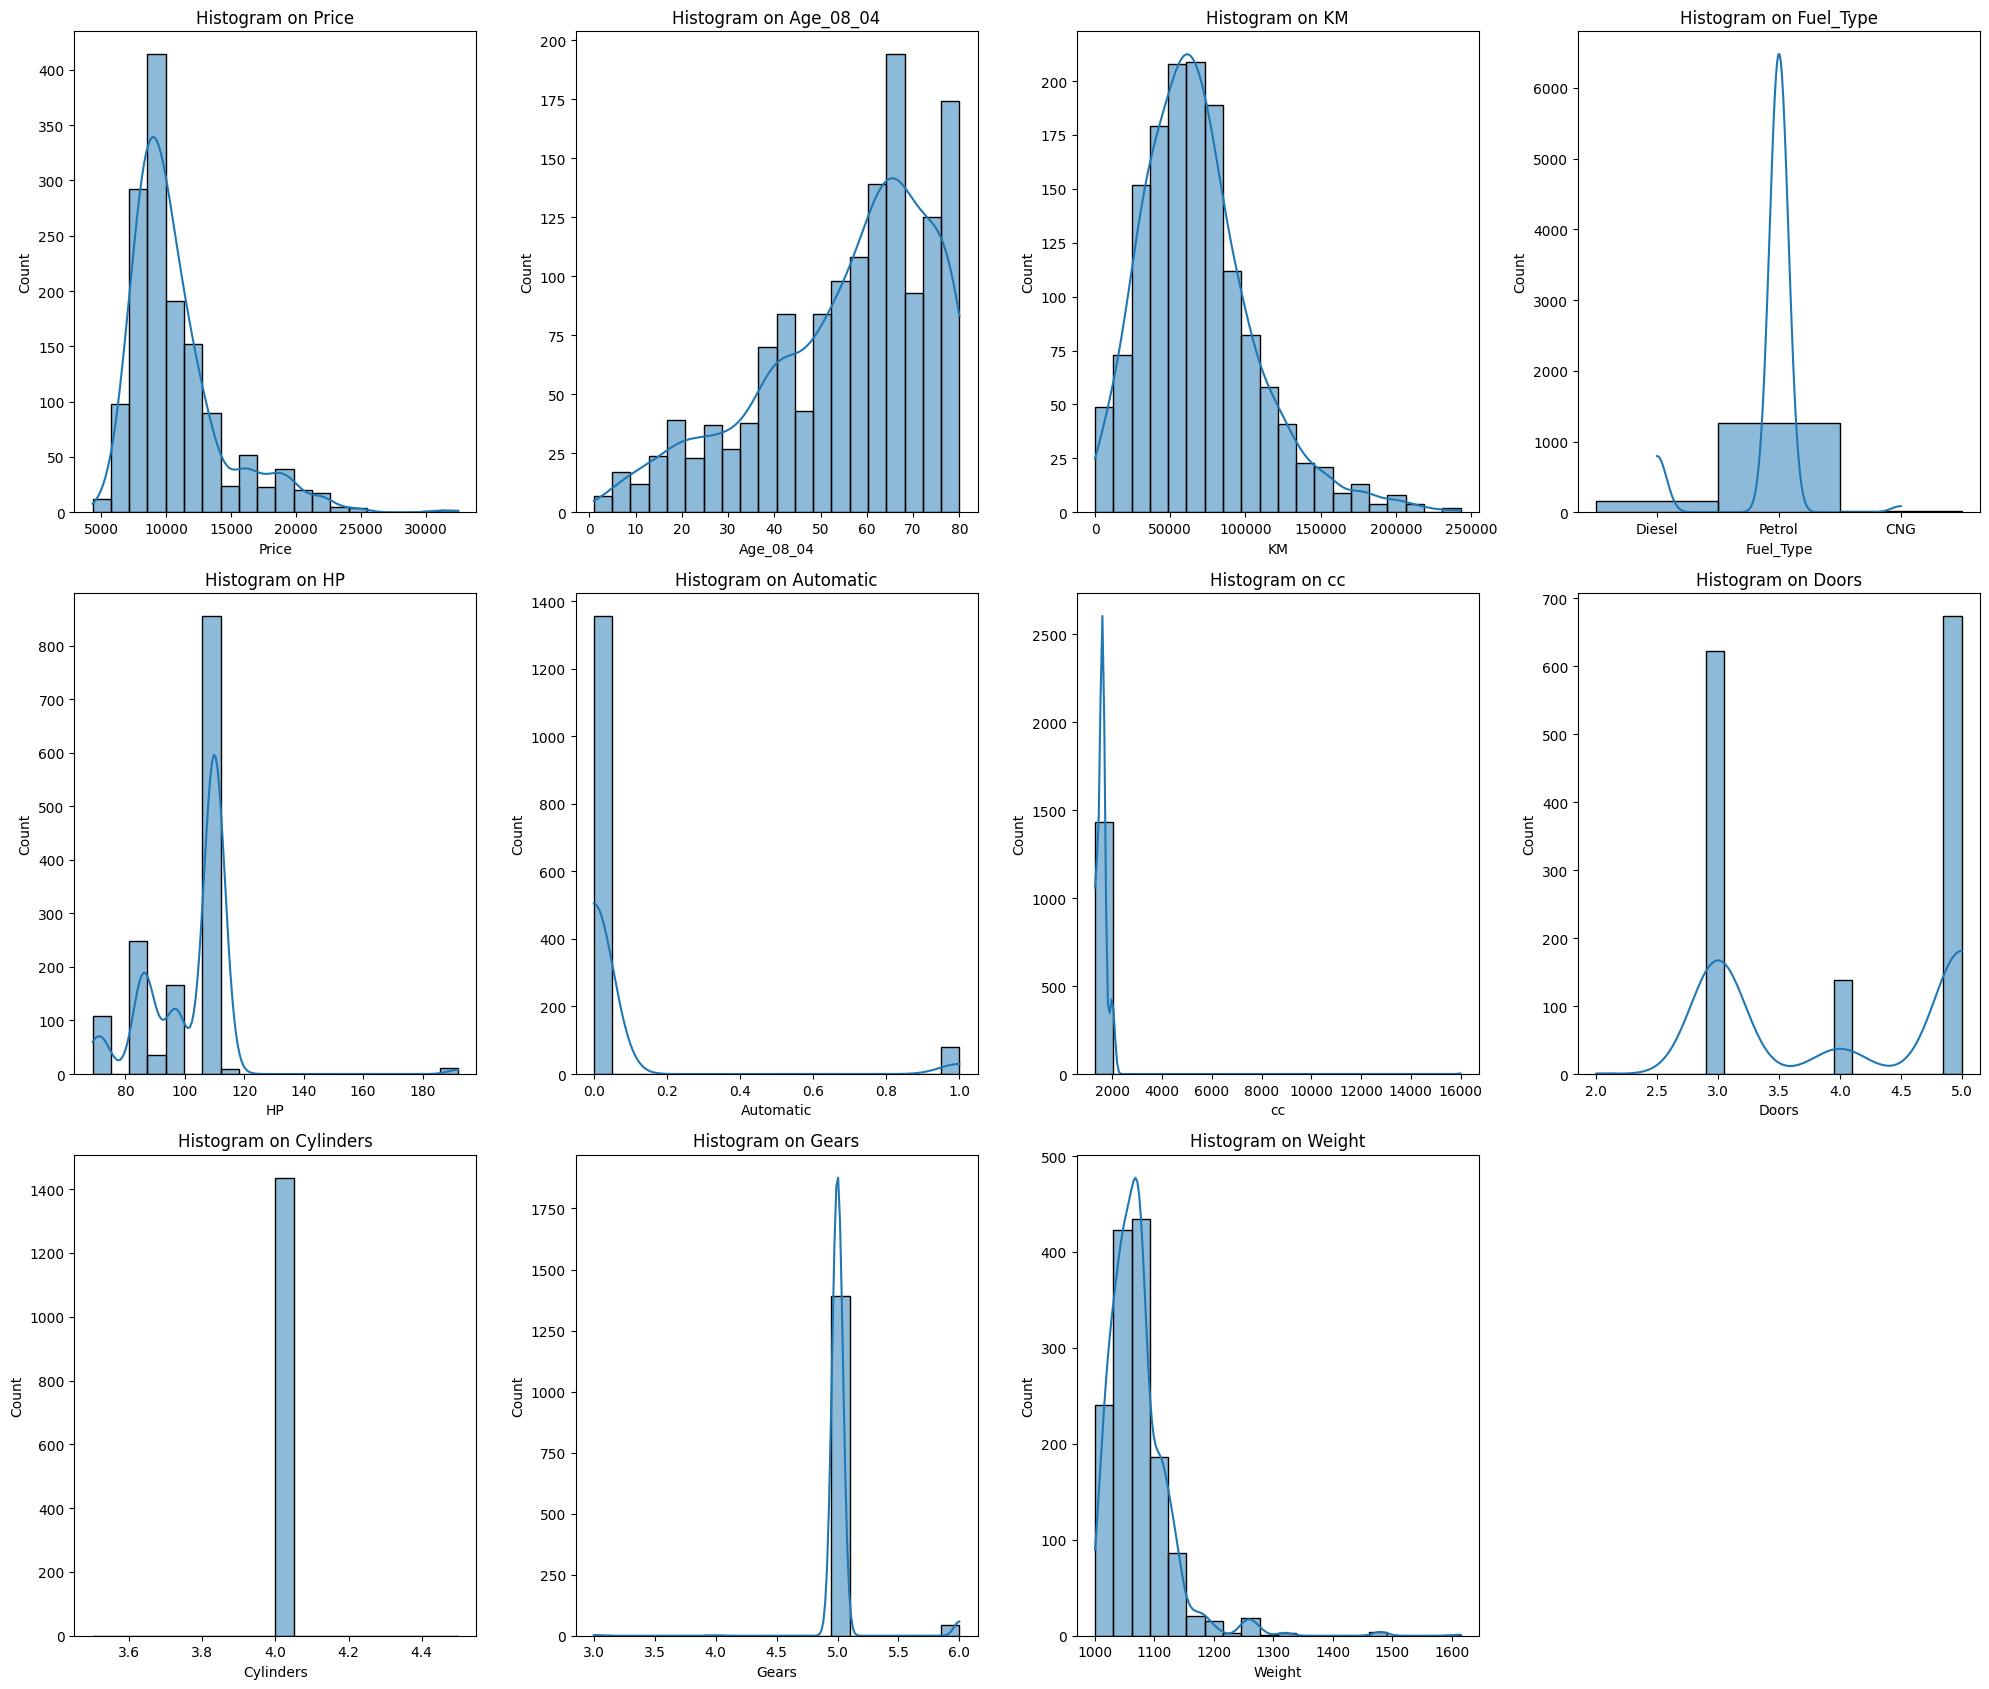

In [5]:
#  histograms on each variables

plt.figure(figsize = (20,17))
for i , column in enumerate(df.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df[column],kde = True, bins = 20)
    plt.title(f"Histogram on {column}")
plt.tight_layout()
plt.show()

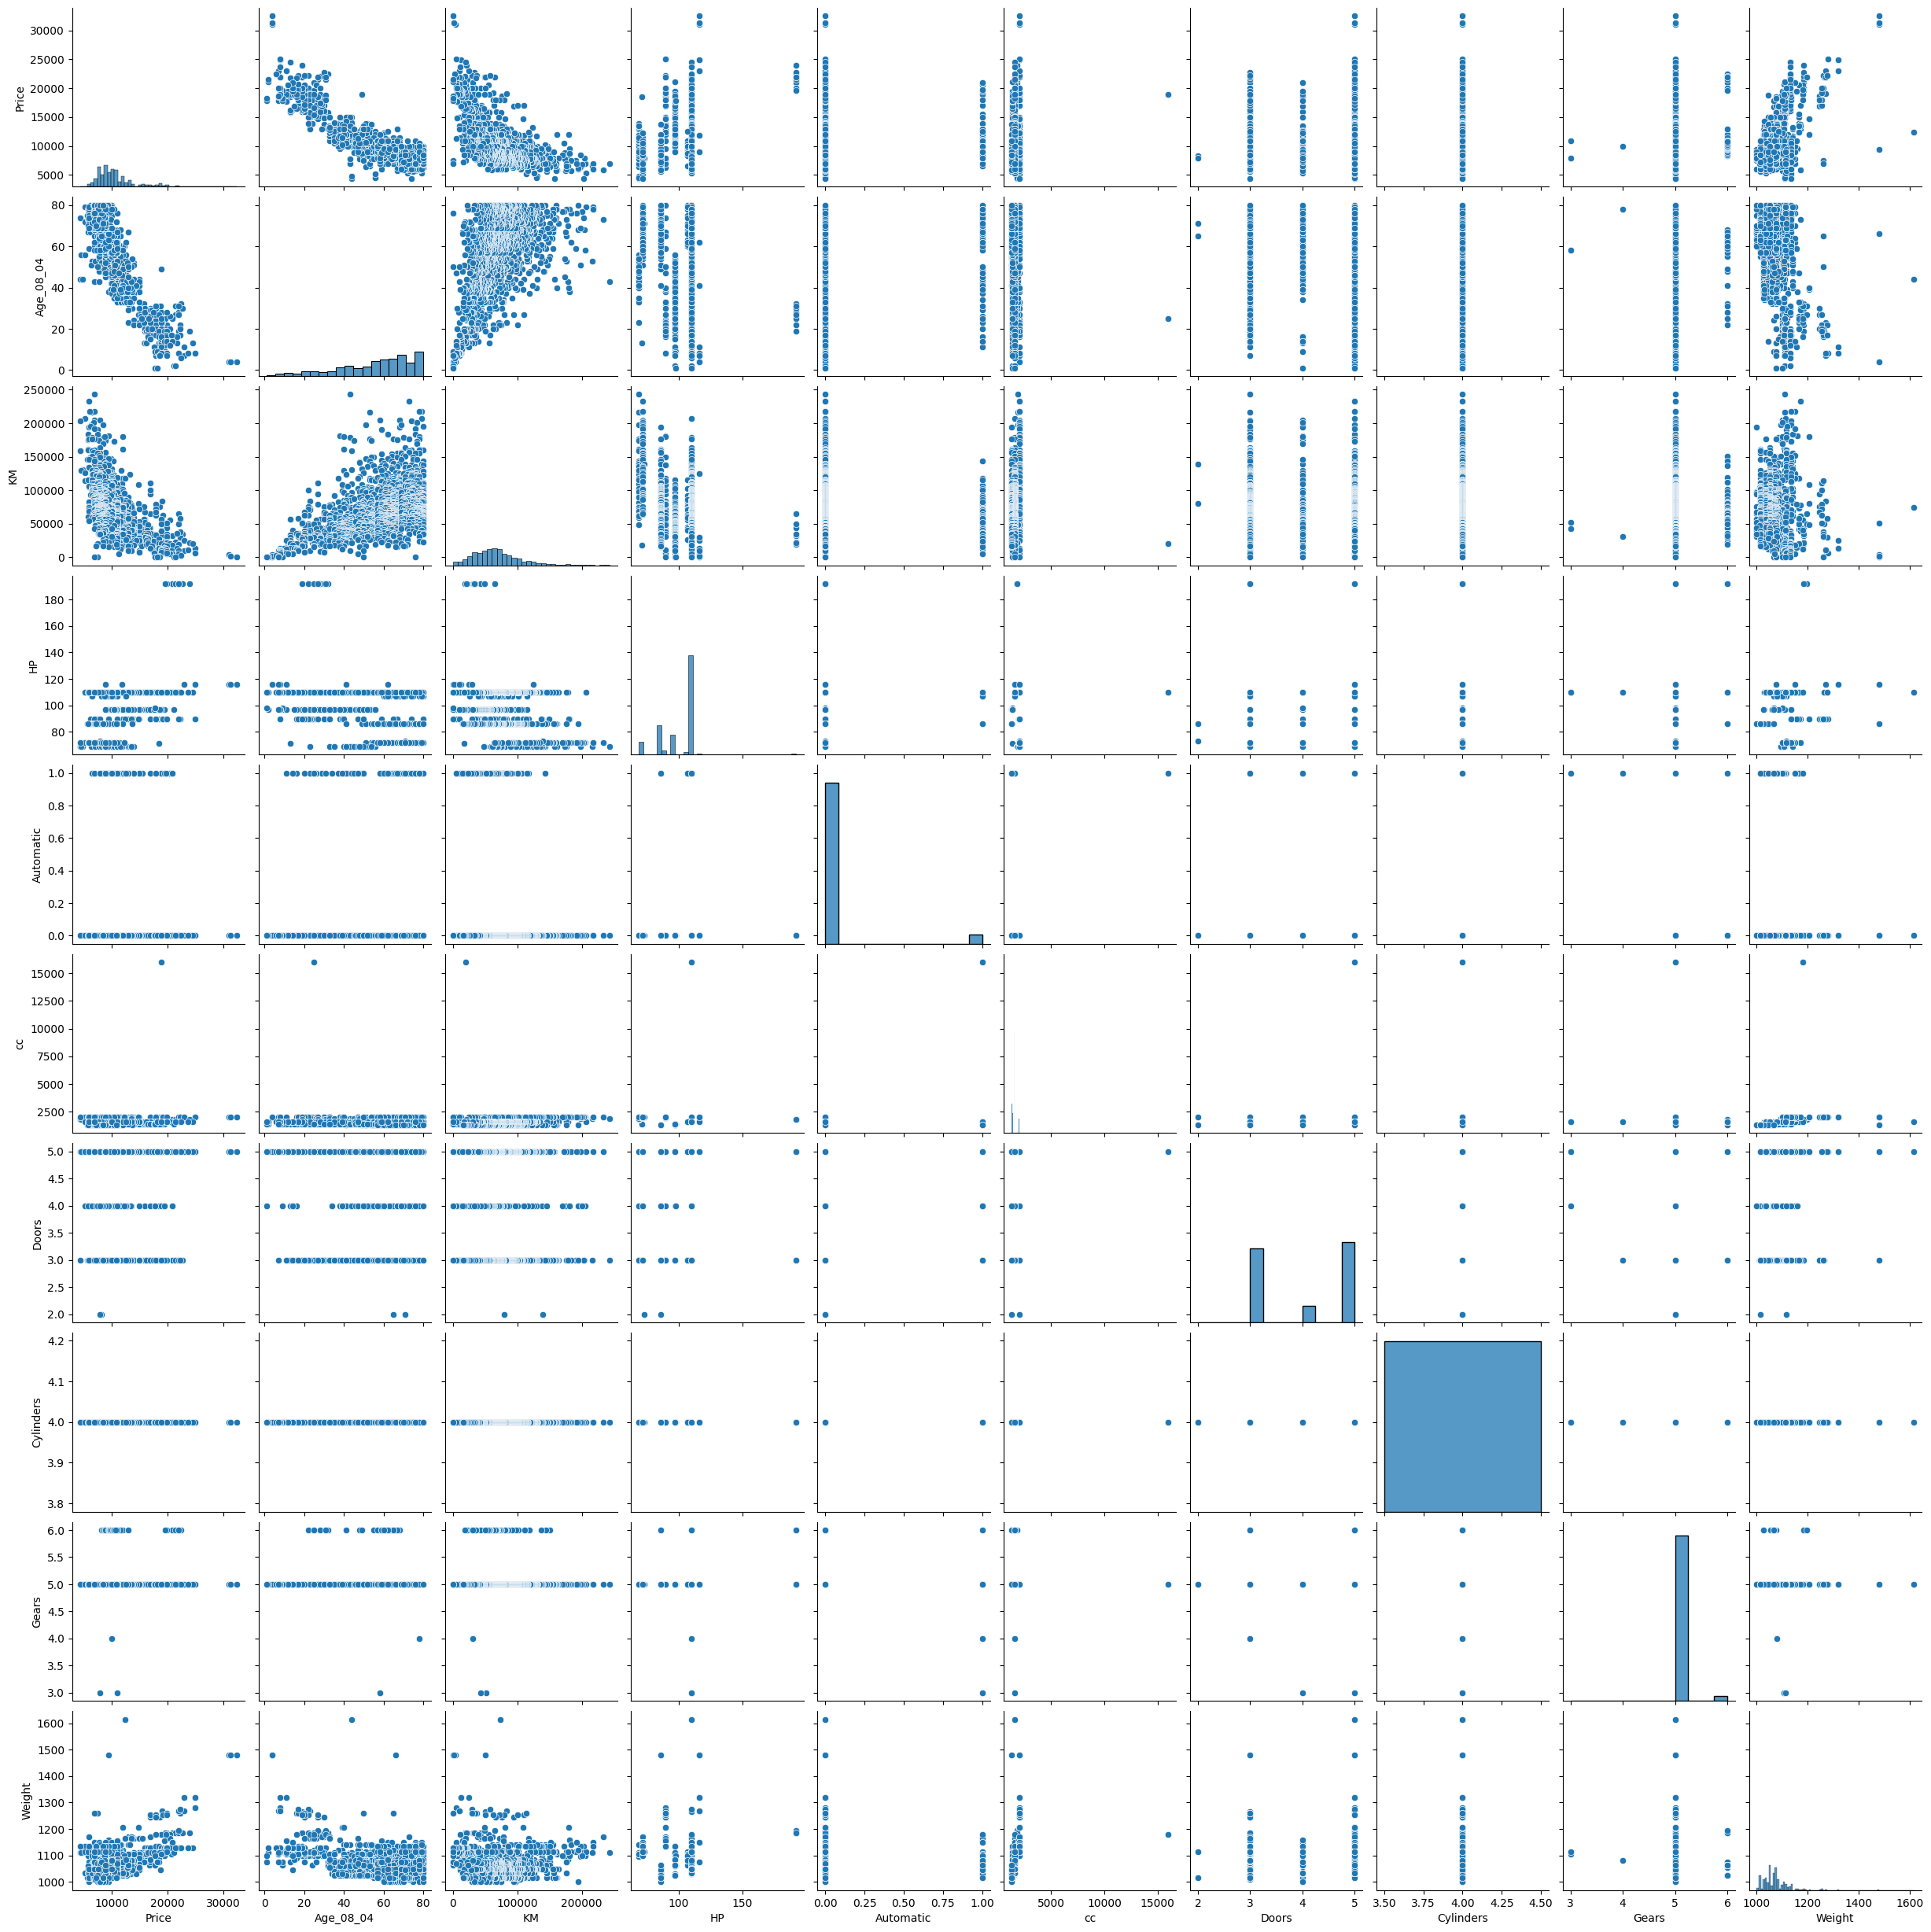

In [6]:
# scatterd the each all variables at a time by using paiplot
sns.pairplot(df)
plt.show()

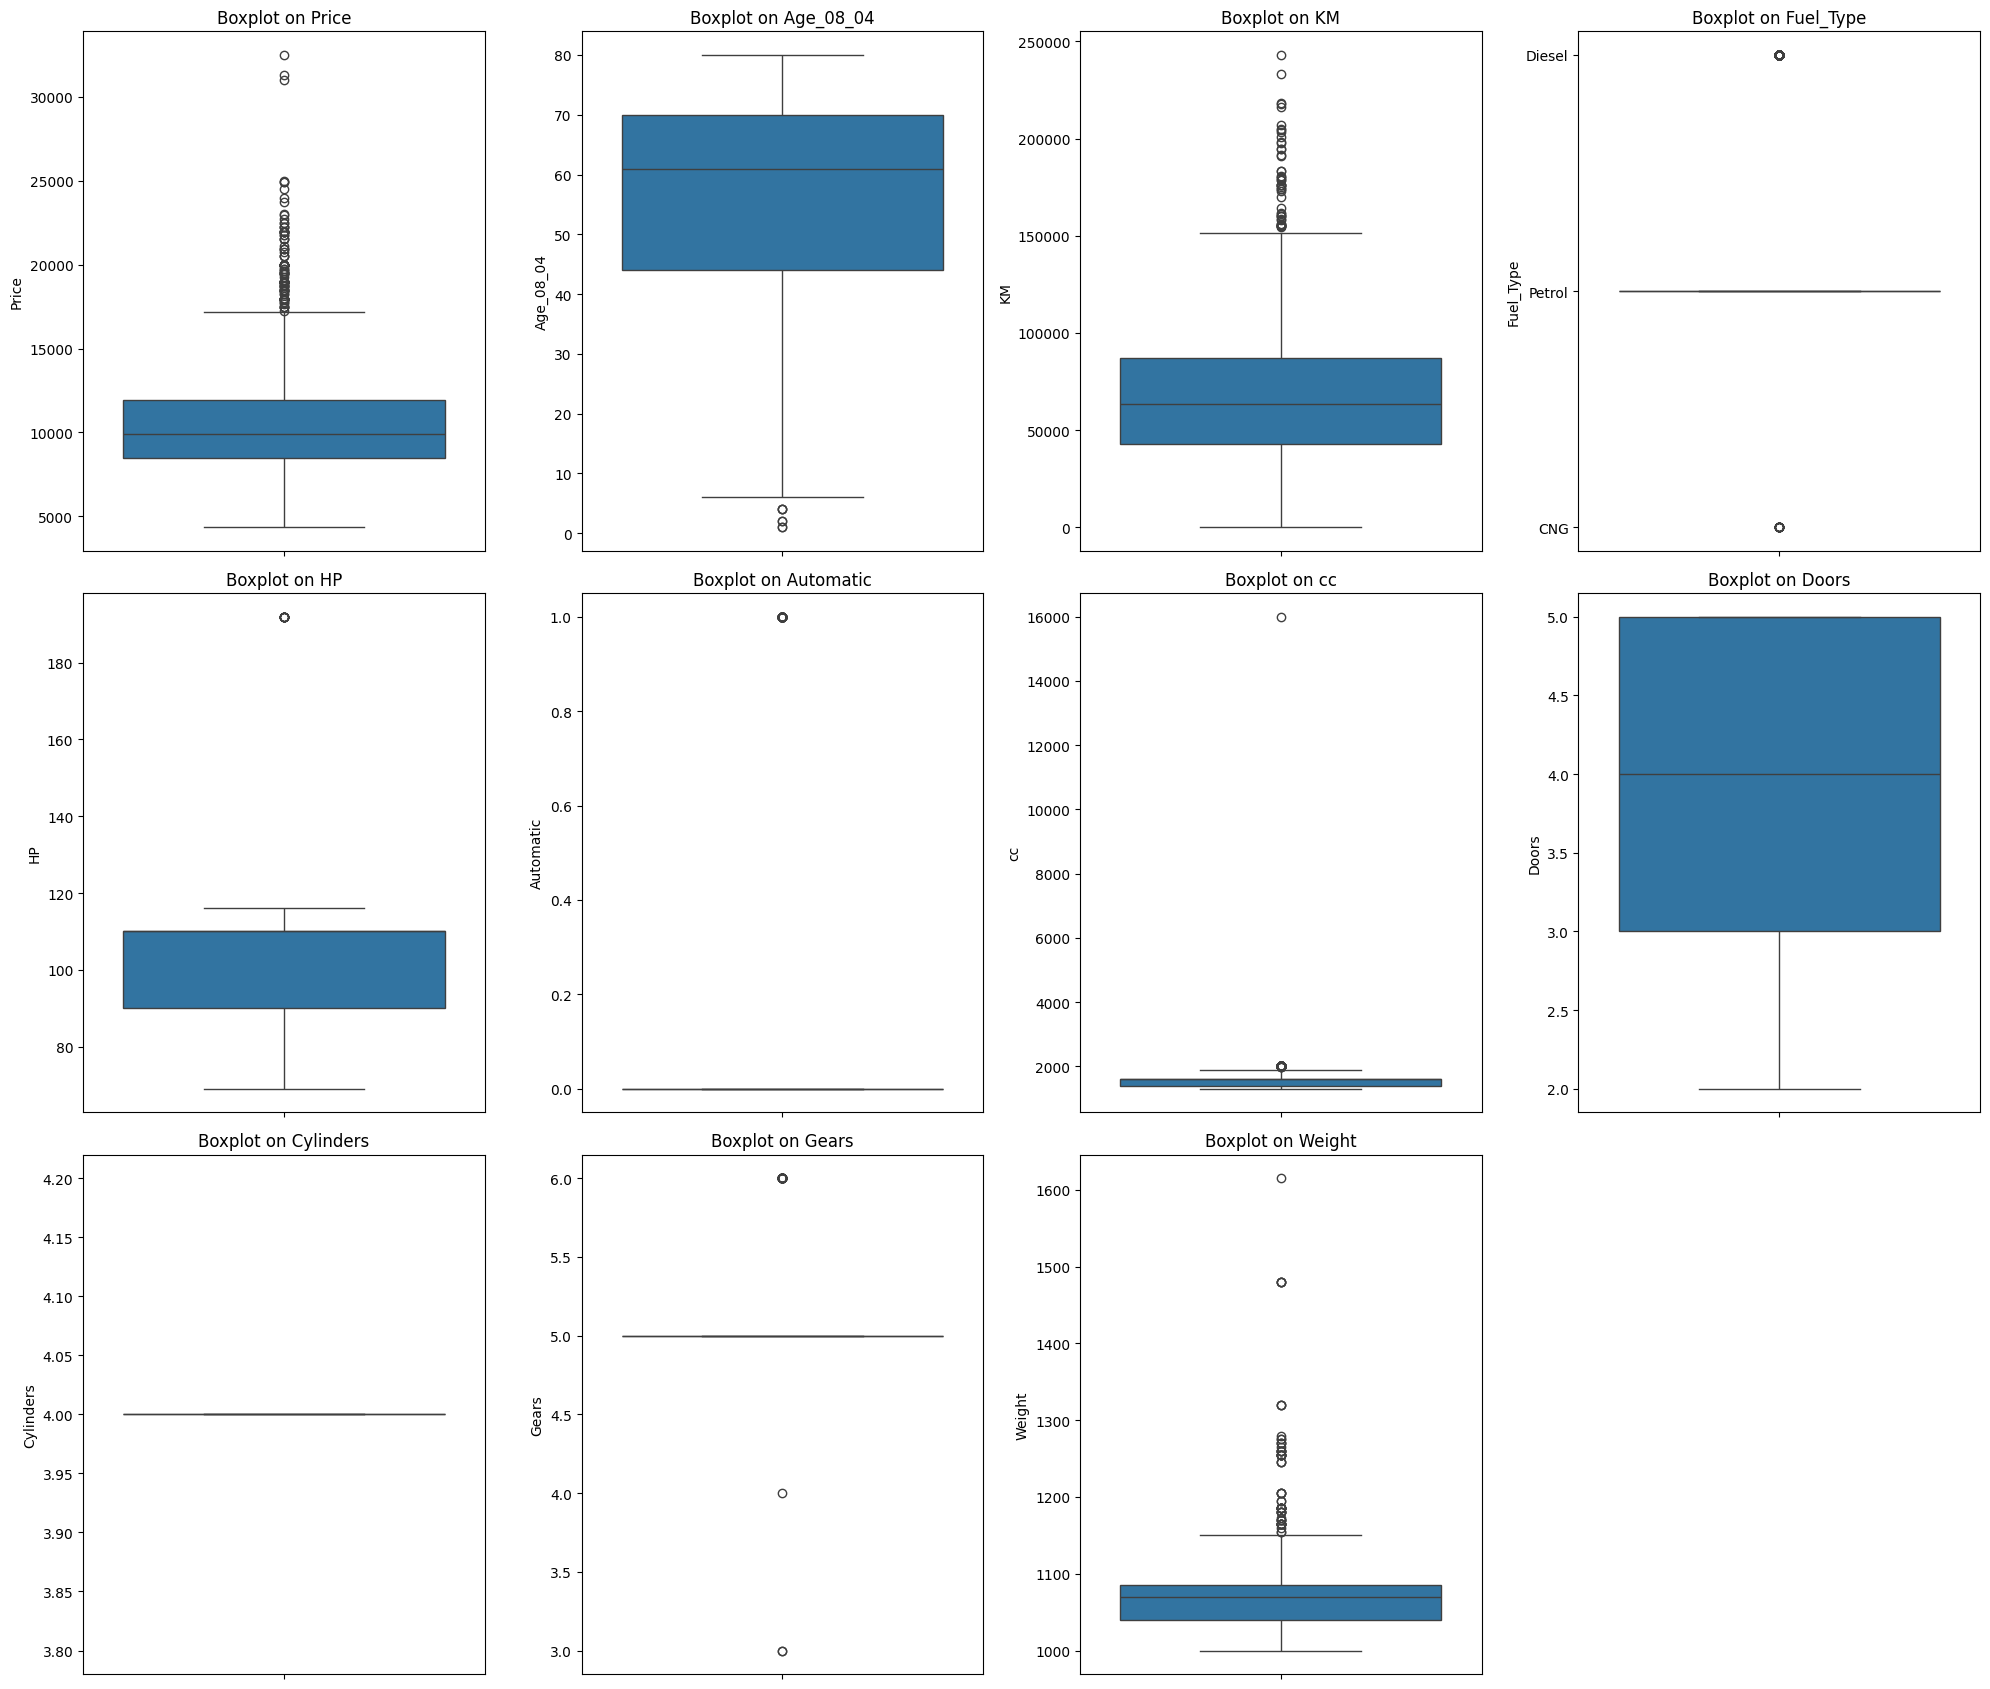

In [7]:
# create a boxplots to identify the outliers

plt.figure(figsize = (20,17))
for i , column in enumerate(df.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[column],vert=True)
    plt.title(f"Boxplot on {column}")
plt.tight_layout()
plt.show()

In [8]:
# Remove the outliers and replace with meadian

def remove_outliers_replace_with_median(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df
df1 = remove_outliers_replace_with_median(df)
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1600.0,3,4,5.0,1070.0
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1600.0,3,4,5.0,1070.0
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1600.0,3,4,5.0,1070.0
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1600.0,3,4,5.0,1070.0
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1600.0,3,4,5.0,1070.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,Petrol,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,10845.0,72.0,19000.0,Petrol,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,8500.0,71.0,17016.0,Petrol,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,7250.0,70.0,16916.0,Petrol,86.0,0.0,1300.0,3,4,5.0,1015.0


In [9]:
# Fuel_type is categorical data ,so canverted into numerical by using LabelEncoder

a = df1['Fuel_Type']
a

,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel
...,...
1431,Petrol
1432,Petrol
1433,Petrol
1434,Petrol


In [10]:
# label encoding process

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_d = le.fit_transform(a)
le_d = pd.DataFrame(le_d)
le_d.columns=['Fuel_Type']
le_d.head()

,Fuel_Type
0,1
1,1
2,1
3,1
4,1


In [11]:
#  traget variable

price = df1['Price']

In [12]:
# drop the two variables and remaining variables are stored in a S variable
s = df1.drop(['Fuel_Type','Price'],axis = True)
s

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23.0,46986.0,90.0,0.0,1600.0,3,4,5.0,1070.0
1,23.0,72937.0,90.0,0.0,1600.0,3,4,5.0,1070.0
2,24.0,41711.0,90.0,0.0,1600.0,3,4,5.0,1070.0
3,26.0,48000.0,90.0,0.0,1600.0,3,4,5.0,1070.0
4,30.0,38500.0,90.0,0.0,1600.0,3,4,5.0,1070.0
...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,72.0,19000.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,71.0,17016.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,70.0,16916.0,86.0,0.0,1300.0,3,4,5.0,1015.0


In [13]:
# remaining  data converted into Standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x = ss.fit_transform(s)
ss_x = pd.DataFrame(ss_x)
ss_x.columns = ['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
ss_x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.824205,-0.570290,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027
1,-1.824205,0.272542,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027
2,-1.769312,-0.741610,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027
3,-1.659525,-0.537357,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027
4,-1.439953,-0.845896,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027
...,...,...,...,...,...,...,...,...,...
1431,0.700882,-1.429068,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.206264
1432,0.865562,-1.479213,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439
1433,0.810669,-1.543649,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439
1434,0.755775,-1.546897,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439


In [14]:
# added the labelencoding, stadradization and torget variable

final = pd. concat([ss_x,le_d,price],axis = 1)
final

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type,Price
0,-1.824205,-0.570290,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027,1,13500.0
1,-1.824205,0.272542,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027,1,13750.0
2,-1.769312,-0.741610,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027,1,13950.0
3,-1.659525,-0.537357,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027,1,14950.0
4,-1.439953,-0.845896,-0.855133,0.0,0.499915,-1.085139,0.0,0.0,0.158027,1,13750.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.700882,-1.429068,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.206264,2,7500.0
1432,0.865562,-1.479213,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439,2,10845.0
1433,0.810669,-1.543649,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439,2,8500.0
1434,0.755775,-1.546897,-1.169694,0.0,-1.734144,-1.085139,0.0,0.0,-1.509439,2,7250.0


In [15]:
X = final.iloc[:,0:10]
Y = final['Price']

In [16]:
# data partition

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [17]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [18]:
# model 1 : predict the  train and test variables

Y_pred_train = model1.predict(X_train)
Y_pred_test = model1.predict(X_test)
Y_pred_train

array([ 9322.6142068 ,  8345.8019067 ,  8939.36640242, ...,
       11511.26342167, 10122.69170982,  8749.46763213])

In [19]:
# model 2

X2 = final.iloc[:,0:9]
Y2 = final['Price']
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X2_train,Y2_train)
Y2_pred_train2 = model2.predict(X2_train)
Y2_pred_test2 = model2.predict(X2_test)
Y2_pred_train2

array([11620.7641622 ,  9543.7201644 , 13328.93193163, ...,
        8978.216347  , 11449.29064275, 10680.36738714])

In [20]:
# model 3

X3 = final.iloc[:,0:5]
Y3 = final['Price']
from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train,Y3_train)
Y3_pred_train3 = model3.predict(X3_train)
Y3_pred_test3 = model3.predict(X3_test)
Y3_pred_train3

array([ 8294.42335549,  9208.04784892,  8983.16433672, ...,
        9146.13149055, 11104.35369689, 10084.50429617])

In [21]:
# used the metrics RMSE and R2,
# model 1

from sklearn.metrics import root_mean_squared_error,r2_score
RMSE = root_mean_squared_error(Y_pred_test,Y_test)
R2 = r2_score(Y_pred_test,Y_test)
print("Root mean Square Error :",np.round(RMSE,3))
print("R2 error:",np.round(R2,3))

Root mean Square Error : 1639.07
R2 error: -0.254


In [22]:
# model 2

from sklearn.metrics import root_mean_squared_error,r2_score
RMSE = root_mean_squared_error(Y2_pred_test2,Y2_test)
R2 = r2_score(Y2_pred_test2,Y2_test)
print("Root mean Square Error :",np.round(RMSE,3))
print("R2 error:",np.round(R2,3))

Root mean Square Error : 1505.288
R2 error: -0.035


In [23]:
# model 3

from sklearn.metrics import root_mean_squared_error,r2_score
RMSE = root_mean_squared_error(Y3_pred_test3,Y3_test)
R2 = r2_score(Y3_pred_test3,Y3_test)
print("Root mean Square Error :",np.round(RMSE,3))
print("R2 error:",np.round(R2,3))

Root mean Square Error : 1541.834
R2 error: -0.176


# **Ridge method**

In [24]:
# used the Ridge

from sklearn.linear_model import Ridge
RR = Ridge(alpha = 0) # 0,1
RR.fit(X_train,Y_train)
RR.coef_
le_coef = pd.DataFrame(RR.coef_)
le_coef

,0
0,-1.365423e+03
1,-9.768094e+01
2,2.673384e+02
3,-5.272059e+17
4,-2.318717e+02
5,6.336877e+01
6,1.334859e+17
7,6.037864e+01
8,2.507413e+02
9,6.933616e+02


In [25]:
RR = Ridge(alpha = 1)
RR.fit(X_train,Y_train)
RR.coef_
ridge_1 = pd.DataFrame(RR.coef_)
ridge_1

,0
0,-1363.440452
1,-116.244546
2,278.652544
3,0.000000
4,-166.250765
5,38.855167
6,0.000000
7,0.000000
8,196.489281
9,535.887415


In [26]:
df2 = pd.DataFrame(list(X))
df6 = pd.concat([df2,le_coef,ridge_1],axis = 1)
df6

,0,0,0
0,Age_08_04,-1.365423e+03,-1363.440452
1,KM,-9.768094e+01,-116.244546
2,HP,2.673384e+02,278.652544
3,Automatic,-5.272059e+17,0.000000
4,cc,-2.318717e+02,-166.250765
5,Doors,6.336877e+01,38.855167
6,Cylinders,1.334859e+17,0.000000
7,Gears,6.037864e+01,0.000000
8,Weight,2.507413e+02,196.489281
9,Fuel_Type,6.933616e+02,535.887415


In [27]:
# dropped the variables wich one is nearby the Zero

X_new = X.drop(X.columns[[3,6,7]],axis = 1)
X_new

,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type
0,-1.824205,-0.570290,-0.855133,0.499915,-1.085139,0.158027,1
1,-1.824205,0.272542,-0.855133,0.499915,-1.085139,0.158027,1
2,-1.769312,-0.741610,-0.855133,0.499915,-1.085139,0.158027,1
3,-1.659525,-0.537357,-0.855133,0.499915,-1.085139,0.158027,1
4,-1.439953,-0.845896,-0.855133,0.499915,-1.085139,0.158027,1
...,...,...,...,...,...,...,...
1431,0.700882,-1.429068,-1.169694,-1.734144,-1.085139,-1.206264,2
1432,0.865562,-1.479213,-1.169694,-1.734144,-1.085139,-1.509439,2
1433,0.810669,-1.543649,-1.169694,-1.734144,-1.085139,-1.509439,2
1434,0.755775,-1.546897,-1.169694,-1.734144,-1.085139,-1.509439,2


In [28]:
#  used the shuffle cross validation

training_err = []
test_err = []
for i in range (1,100):
    X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(X_new,Y,test_size = 0.3,random_state = i)
    RR.fit(X_train_new,Y_train_new)
    Y_pred_train_new = RR.predict(X_train_new)
    Y_pred_test_new = RR.predict(X_test_new)
    training_err.append(root_mean_squared_error(Y_train_new,Y_pred_train_new))
    test_err.append(root_mean_squared_error(Y_test_new,Y_pred_test_new))


d1 = pd.DataFrame(training_err)
d2 = pd.DataFrame(test_err)
print('cross validation training error :',np.round(np.mean(d1),3))
print('cross validation test error :',np.round(np.mean(d2),3))

cross validation training error : 1625.232
cross validation test error : 1642.68


# **Lasso method**

In [29]:
# used the lasso method

from sklearn.linear_model import Lasso
LS = Lasso(alpha = 0)  #  alpha = 0,1,2
LS.fit(X_train,Y_train)
LS.coef_
lasso_0 = pd.DataFrame(LS.coef_)
lasso_0

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+09, tolerance: 5.888e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

,0
0,-1365.423122
1,-114.788429
2,277.762106
3,0.000000
4,-165.966072
5,38.526761
6,0.000000
7,0.000000
8,197.045222
9,542.556569


In [30]:
LS = Lasso(alpha = 1)  #  alpha = 0,1,2
LS.fit(X_train,Y_train)
LS.coef_
lasso_1 = pd.DataFrame(LS.coef_)
d3 = pd.DataFrame(list(X))
d5 = pd.concat([d3,lasso_0,lasso_1],axis=1)
d5

,0,0,0
0,Age_08_04,-1365.423122,-1364.887124
1,KM,-114.788429,-115.501839
2,HP,277.762106,277.300286
3,Automatic,0.000000,0.000000
4,cc,-165.966072,-163.515760
5,Doors,38.526761,38.856915
6,Cylinders,0.000000,0.000000
7,Gears,0.000000,0.000000
8,Weight,197.045222,193.192327
9,Fuel_Type,542.556569,532.786273


In [31]:
# dropped the variables wich one is nearby the Zero

X_New = X.drop(X.columns[[3,6,7]],axis = 1)
X_New

,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type
0,-1.824205,-0.570290,-0.855133,0.499915,-1.085139,0.158027,1
1,-1.824205,0.272542,-0.855133,0.499915,-1.085139,0.158027,1
2,-1.769312,-0.741610,-0.855133,0.499915,-1.085139,0.158027,1
3,-1.659525,-0.537357,-0.855133,0.499915,-1.085139,0.158027,1
4,-1.439953,-0.845896,-0.855133,0.499915,-1.085139,0.158027,1
...,...,...,...,...,...,...,...
1431,0.700882,-1.429068,-1.169694,-1.734144,-1.085139,-1.206264,2
1432,0.865562,-1.479213,-1.169694,-1.734144,-1.085139,-1.509439,2
1433,0.810669,-1.543649,-1.169694,-1.734144,-1.085139,-1.509439,2
1434,0.755775,-1.546897,-1.169694,-1.734144,-1.085139,-1.509439,2


In [32]:
#  used the shuffle cross validation
training_err = []
test_err = []
for i in range (1,101):
    X_train_New,X_test_New,Y_train_New,Y_test_New = train_test_split(X_New,Y,test_size = 0.3,random_state = i)
    LS.fit(X_train_New,Y_train_New)
    Y_pred_train_New = LS.predict(X_train_New)
    Y_pred_test_New = LS.predict(X_test_New)
    training_err.append(root_mean_squared_error(Y_train_New,Y_pred_train_New))
    test_err.append(root_mean_squared_error(Y_test_New,Y_pred_test_New))


d1 = pd.DataFrame(training_err)
d2 = pd.DataFrame(test_err)
print('cross validation training error :',np.round(np.mean(d1),3))
print('cross validation test error :',np.round(np.mean(d2),3))

cross validation training error : 1625.062
cross validation test error : 1643.099


# **Interview Questions**

## **1.What is Normalization & Standardization and how is it helpful?**

Normalization: It shrinks all your data values into a range between 0 and 1.

how it is usefull:

If one feature (like age) goes from 0–100 and another (like salary) goes from 0–100,000, the big numbers can dominate. Normalization puts everything on the same scale.

Standardization: It shifts your data so that the average is 0 and the standard deviation is 1.

how it is usefull:

Some models work better when data looks like a bell curve (normal distribution). Standardization helps with that and handles outliers better than normalization.

## **2.What techniques can be used to address multicollinearity in multiple linear regression?**

1.Remove one of the correlated features:

If two variables are almost the same, just drop one.

Example: If both “height in cm” and “height in inches” are in the model — keep just one.


2.Combine correlated variables:

You can create a new variable that combines them.

Example: Combine highly related test scores into a single “average score.”

3.Use Principal Component Analysis (PCA):

*   PCA reduces the number of features by creating new uncorrelated variables.
*   It keeps most of the information but gets rid of multicollinearity.

4.Use Regularization Techniques (like Ridge or Lasso Regression):

*   These models add a penalty to the regression to shrink coefficients and reduce multicollinearity effects.

*   Ridge is great when features are correlated.
*   Lasso can even remove some variables completely by shrinking their coefficients to zero.

5.Check with VIF (Variance Inflation Factor):


*   Calculate the VIF score for each variable.
*   If VIF > 5 or 10 → multicollinearity is likely → drop or transform those variables.

